In [1]:
import pandas as pd
import numpy as np;
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
hiscores = pd.read_csv('./FSW_Competitive_Final_Long.csv',index_col = 0)

In [3]:
hiscores.columns
hiscores.head()

Username  Rank   Level   Experience  Category
0       fsw pot   1.0  2838.0  819025425.0         0
1  died2wallfsw   2.0  2815.0  669394028.0         0
2       Vaikiss   3.0  2800.0  571513781.0         0
3         G-b-y   4.0  2777.0  450000000.0         0
4   64 dog 2137   5.0  2766.0  464645767.0         0

This dataset contains the results of the Fresh Start Worlds competitive period. It was scraped from the Fresh Start Worlds results hiscores. These hiscores list the top 99 pages of players in each skill and overall, so there are 2,475 people in each skill. The Category is the label given to each skill in the hiscores url. Category of 0 is for overall. 

In [4]:
# Map to convert the numeric category to the skill name.
hiscores_map = {0:'Overall', 1:'Attack', 2:'Defence', 3:'Strength', 4:'Constitution', 5:'Ranged', 6:'Prayer', 7:'Magic', 8:'Cooking', 9:'Woodcutting', 10:'Fletching', 11:'Fishing', 12:'Firemaking', 13:'Crafting', 14:'Smithing', 15:'Mining', 16:'Herblore', 17:'Agility', 18:'Thieving', 19:'Slayer', 20:'Farming', 21:'Runecrafting', 22:'Hunter', 23:'Construction', 24:'Summoning', 25:'Dungeoneering', 26:'Divination', 27:'Invention', 28:"Archaeology"}
hiscores['Category'] = hiscores['Category'].map(hiscores_map)

In [26]:
totalPlayers = hiscores['Username'].unique().shape[0]
print(f'There were {totalPlayers} unique players in the top 2,475 of an individual or total level.')

There were 16442 unique players in the top 2,475 of an individual or total level.


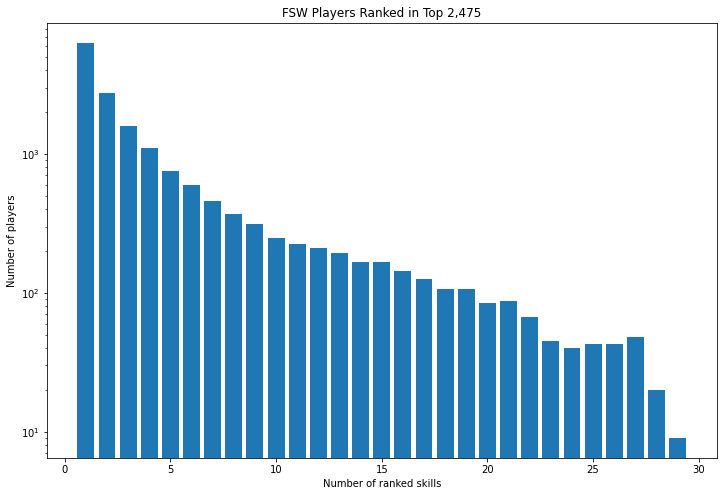

In [5]:
# Counts the number of times each player appears in these hiscores and then counts the number 
# of players that appear that many times.
numTopRanks = hiscores['Username'].value_counts().value_counts()
fig = plt.figure(0, figsize = (12,8))
ax = fig.add_subplot(111)
plot = ax.bar(numTopRanks.index, numTopRanks)
ax.set_yscale('log')
plt.title('FSW Players Ranked in Top 2,475')
plt.xlabel('Number of ranked skills')
fig_ylabel = plt.ylabel('Number of players')

In [6]:
numTopRanks.sort_index(inplace=True)
numTopRanks

1     6326
2     2766
3     1586
4     1095
5      758
6      596
7      457
8      369
9      312
10     250
11     226
12     210
13     192
14     166
15     166
16     143
17     126
18     106
19     106
20      84
21      87
22      67
23      45
24      40
25      43
26      43
27      48
28      20
29       9
Name: Username, dtype: int64

In [7]:
oneskill = hiscores['Username'].value_counts()[hiscores['Username'].value_counts() == 1]
oneskill_hiscores = hiscores[hiscores['Username'].isin(oneskill.index)]

twoskill = hiscores['Username'].value_counts()[hiscores['Username'].value_counts() == 2]
twoskill_hiscores = hiscores[hiscores['Username'].isin(twoskill.index)]

In [8]:
# Dictionary of colors for the inverted 120 capes. Color was found using a color picker and picking a point a little above
# the skill logo on the back of the cape.
inverted_skillcape_colormap = {
    "Agility" : "#bb3329",
    "Archaeology" : "#1f2024",
    "Attack" : "#eace14",
    "Constitution" : "#d53f34",
    "Construction" : "#c1992b",
    "Cooking" : "#961100",
    "Crafting" : "#cbc74b",
    "Defence" : "#dae5e5",
    "Divination" : "#2eb5b3",
    "Dungeoneering" : "#cacbd3",
    "Farming" : "#9bc074",
    "Firemaking" : "#c4b94b",
    "Fishing" : "#ccbf4f",
    "Fletching" : "#e8ba13",
    "Herblore" : "#d8d110",
    "Hunter" : "#342100",
    "Invention" : "#2fa6f3",
    "Magic" : "#3640ce",
    "Mining" : "#63cae8",
    "Prayer" : "#f6f019",
    "Ranged" : "#bd6c0b",
    "Runecrafting" : "#eddd16",
    "Slayer" : "#941200",
    "Smithing" : "#cec46e",
    "Strength" : "#b61c0c",
    "Summoning" : "#bdb146",
    "Thieving" : "#202024",
    "Woodcutting" : "#309154"
} 

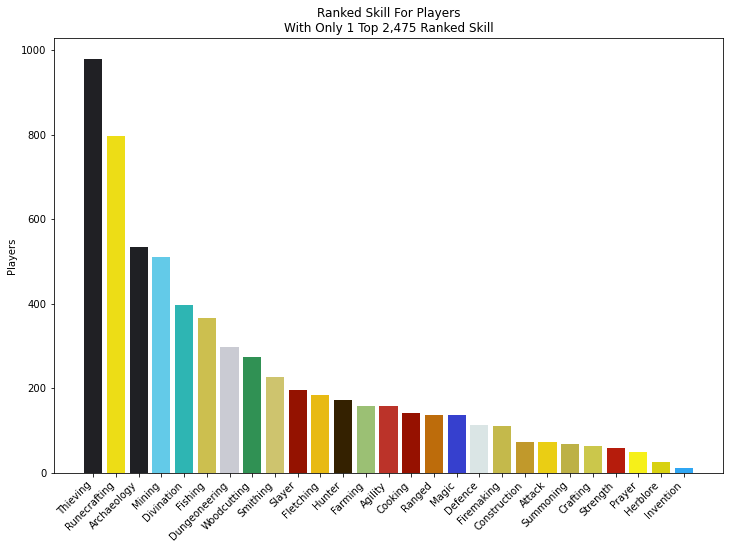

In [11]:
oneskillfig = plt.figure('oneskill',figsize=(12,8))
oneskillax = oneskillfig.add_subplot(111)
oneskillcounts = oneskill_hiscores['Category'].value_counts()
colors = oneskillcounts.index.map(inverted_skillcape_colormap)
oneskillplot = plt.bar(oneskillcounts.index, oneskillcounts, color = colors)
oneskill_xticks = plt.xticks(rotation = 45,ha = 'right')
plt.title('Ranked Skill For Players\nWith Only 1 Top 2,475 Ranked Skill')
plt.ylabel('Players');

In [40]:
print(oneskillcounts)

Thieving         979
Runecrafting     796
Archaeology      535
Mining           510
Divination       397
Fishing          367
Dungeoneering    298
Woodcutting      274
Smithing         227
Slayer           197
Fletching        185
Hunter           172
Farming          159
Agility          159
Cooking          143
Ranged           138
Magic            138
Defence          114
Firemaking       112
Construction      74
Attack            74
Summoning         69
Crafting          63
Strength          59
Prayer            50
Herblore          25
Invention         12
Name: Category, dtype: int64


           Username    Rank   Level   Experience       Category
3174    AshenPidgey  2475.0  2107.0  152532746.0        Overall
5624        Altussy  2475.0    99.0   13074248.0         Attack
8074        maindog  2475.0    99.0   20036485.0        Defence
10524  TheRockSucks  2475.0    99.0   13087931.0       Strength
12974    FSW Amberr  2475.0    99.0   27667497.0   Constitution
15424     Permavo1d  2475.0    99.0   13525094.0         Ranged
17874       Maihes1  2475.0    80.0    2070517.0         Prayer
20324     Old Shart  2475.0    99.0   19927227.0          Magic
22774       RizzIer  2475.0    75.0    1280736.0        Cooking
25224   GnomeStiffy  2475.0    80.0    2098472.0    Woodcutting
27674      Usal FSW  2475.0    74.0    1209253.0      Fletching
30124  Burt Buzzing  2475.0    76.0    1373300.0        Fishing
34724   FreshDaveyJ  2475.0    75.0    1248384.0     Firemaking
38024   Omega93Wolf  2475.0    80.0    2135697.0       Crafting
40474     FSWKalten  2475.0    83.0    2

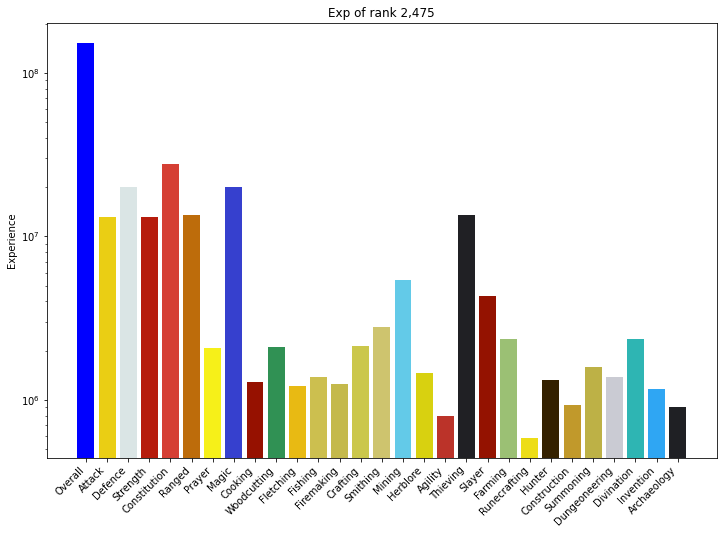

In [39]:
lowest = hiscores[hiscores['Rank'] == 2475]
print(lowest)
lowestRankfig = plt.figure('Lowest',figsize=(12,8))
lowestRankax = lowestRankfig.add_subplot(111)
oneskillcounts = oneskill_hiscores['Category'].value_counts()
lowestcolors = lowest['Category'].map(inverted_skillcape_colormap)
lowestcolors[3174] = '#0000FF'
lowestplot =  plt.bar(lowest['Category'], lowest['Experience'], color = lowestcolors)

oneskill_xticks = plt.xticks(rotation = 45,ha = 'right')
plt.title('Exp of rank 2,475')
plt.ylabel('Experience');
lowestRankax.set_yscale('log')

In [13]:
crossmap = pd.DataFrame(np.zeros((29,29)),index = hiscores['Category'].unique(), columns = hiscores['Category'].unique())
for user in twoskill.index:
    sub = twoskill_hiscores[twoskill_hiscores['Username'] == user]
    x, y = sub['Category']
    crossmap.at[x,y] += 1
    crossmap.at[y,x] += 1

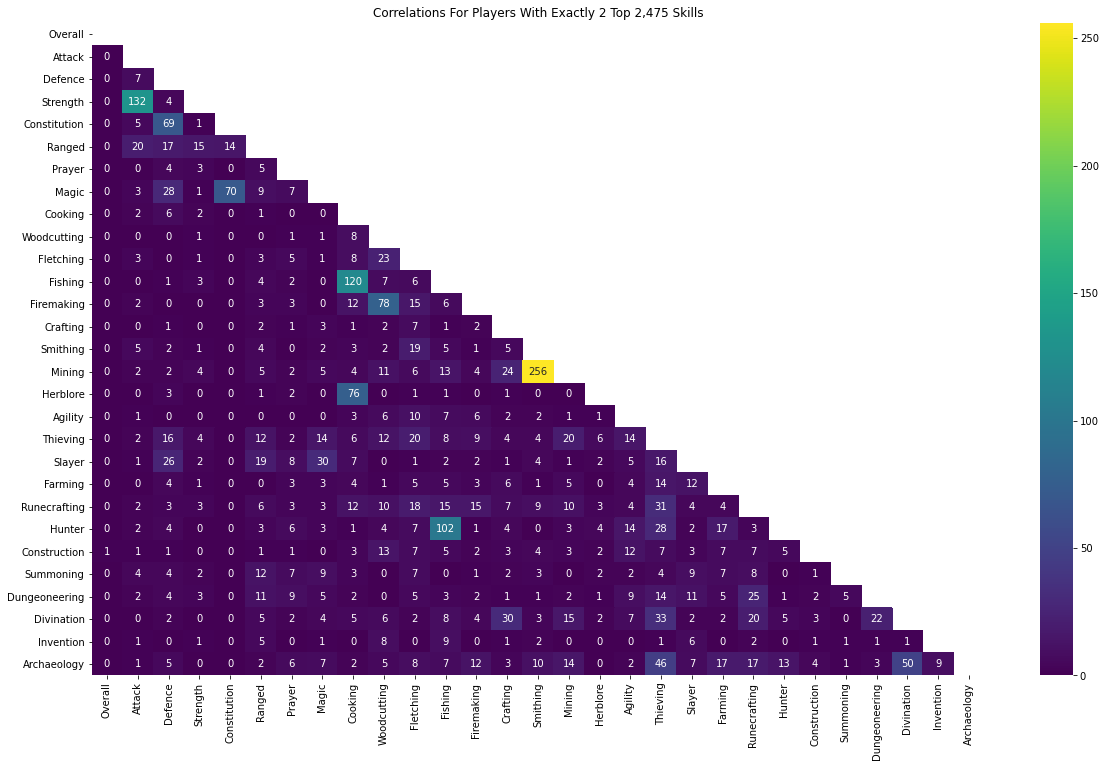

In [14]:
mask = np.triu(np.ones_like(crossmap,dtype=bool))

twoskill_fig = plt.figure('twoskill',figsize=(20,12))
twoskill_ax = twoskill_fig.add_subplot(111)
sns.heatmap(crossmap,annot = True, ax = twoskill_ax, mask = mask, fmt = 'g',cmap='viridis')
plt.title('Correlations For Players With Exactly 2 Top 2,475 Skills');

In [15]:
supportskills = ['Agility','Thieving','Slayer','Dungeoneering']
supporthiscores = hiscores[hiscores['Category'].isin(supportskills)]
supportwide = pd.pivot(supporthiscores, index='Username',columns='Category',values = 'Experience')
supportwide.fillna(0,inplace=True)

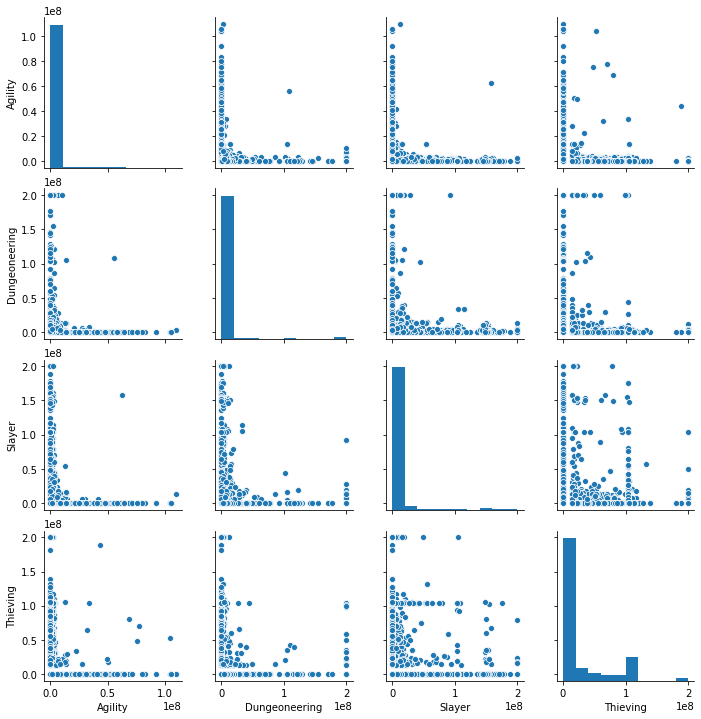

In [16]:
sns.pairplot(supportwide)

In [17]:
allwide = pd.pivot(hiscores, index='Username',columns='Category',values = 'Experience')

D:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


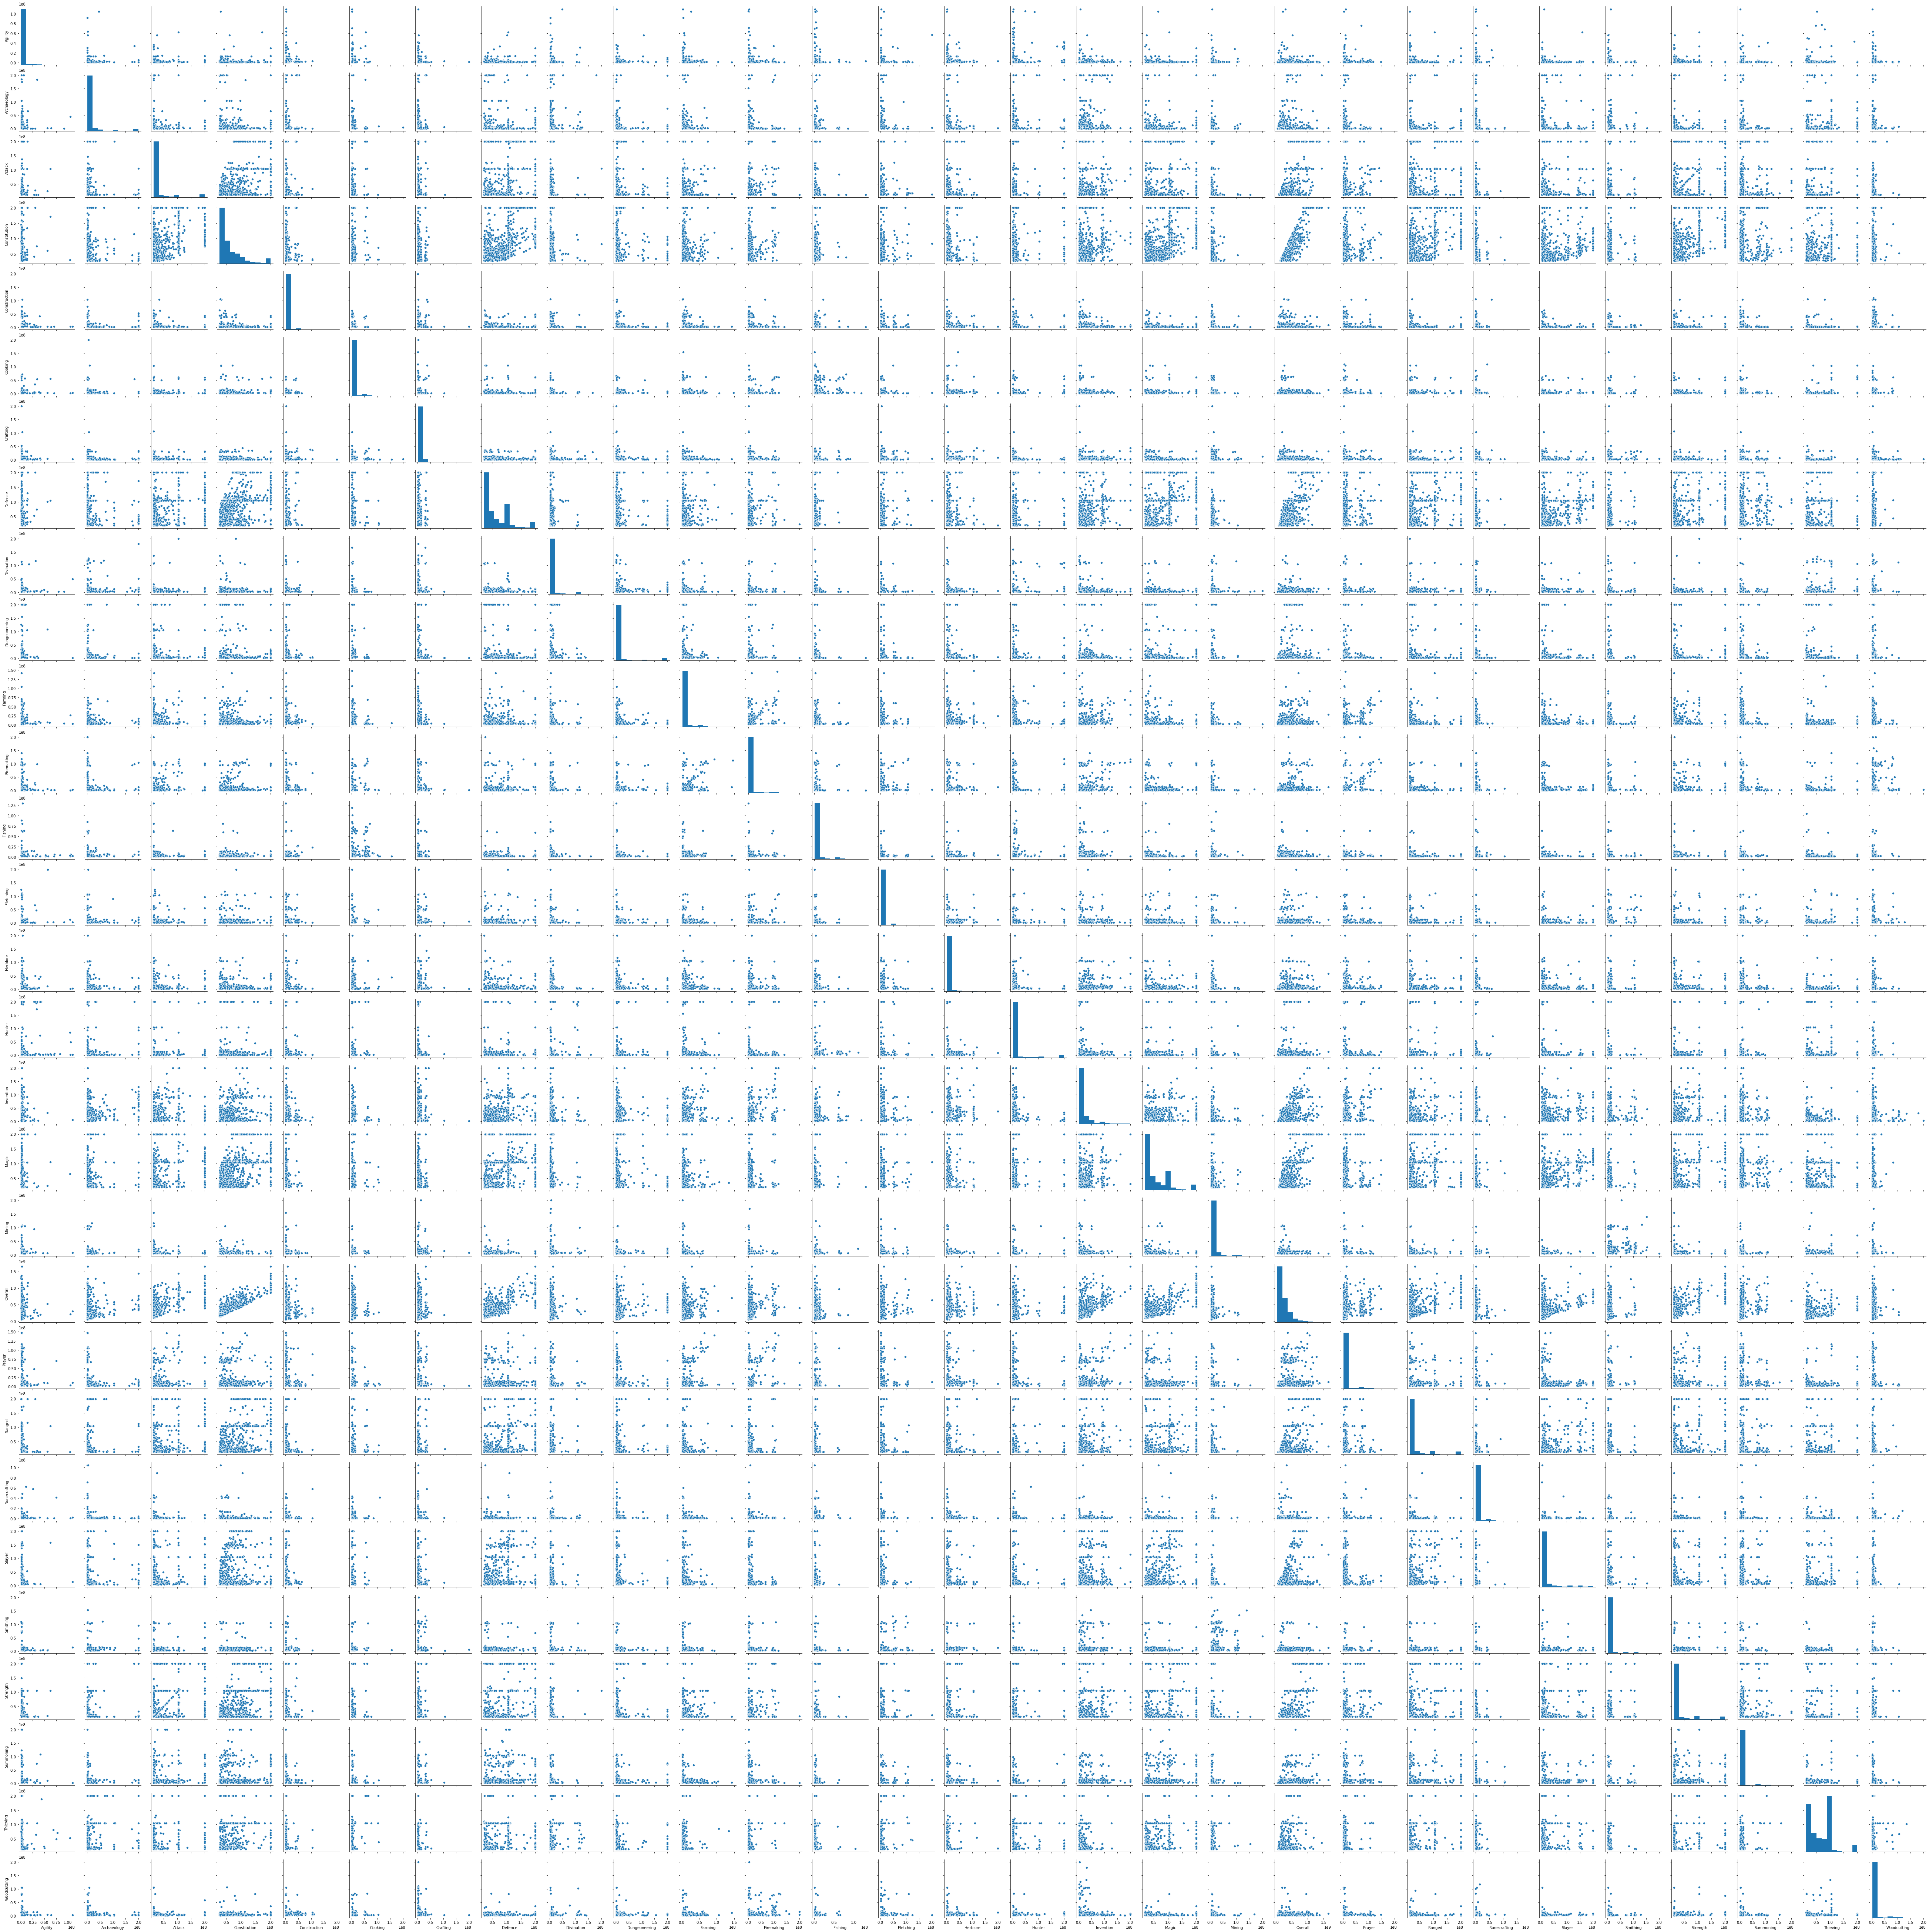

In [18]:
sns.pairplot(allwide)

This plot shows the correlation between all individual skills with each other. I'm not sure how informative it is, since there are so many things plotted and they all show up really small. I would like to view this on the ~50 million pixel VizLab display that my grad school had. Downloading the figure I was able to see the plots a little better, though it still isn't in a format to extract a ton of information.

Some notes and interesting things that stand out. In several of the plots you can see distint lines through the middle, either vertically or horizontally (and sometimes both). These lines are of people that got 120 in the skill and then stopped training it reasonably quickly after. 

The intersection between Defence and Magic is interesting. There are a large number of people that got 120 or 200m in one, but not the other and a distict line of people that got the same amount of Defence and Magic exp between 99 and 120. The line looks to continue from 120 to 200m, but is much less dense. Strength and Attack show a similar relationship, with major differences being that there are fewer people with high experience in these skills and that there is essentially no-one who got over 120 in both skill that didn't end up taking at least one of them to 200m. I would assume that this is becuase anyone who got 120s after the first 100 people got 200m didn't feel a need to train the skill after 120 and instead put their experience into Defence to get that to 120.

# Halos

I now want to look at just the top 100 for each skill and see if there are any interesting things that pop out.

In [19]:
top = hiscores[hiscores['Rank'] <= 100]
top.head()

Username  Rank   Level   Experience Category
0       fsw pot   1.0  2838.0  819025425.0  Overall
1  died2wallfsw   2.0  2815.0  669394028.0  Overall
2       Vaikiss   3.0  2800.0  571513781.0  Overall
3         G-b-y   4.0  2777.0  450000000.0  Overall
4   64 dog 2137   5.0  2766.0  464645767.0  Overall

In [41]:
haloplayers = top['Username'].unique().shape[0]
print(f'There were {haloplayers} unique players who earned challenger halos.')
print(top['Username'].value_counts())
halodata = top['Username'].value_counts().value_counts()
print(halodata)

There were 2220 unique players who earned challenger halos.
Lobbbbbbbbbb    9
PKroyal         7
Dark Ganon      7
Fresh LP        7
Mud Fresh       7
               ..
FSW Ronnie      1
fresh addict    1
TT Milk Drip    1
papio           1
Hirogami        1
Name: Username, Length: 2220, dtype: int64
1    1828
2     238
3      76
4      45
5      19
6       7
7       6
9       1
Name: Username, dtype: int64


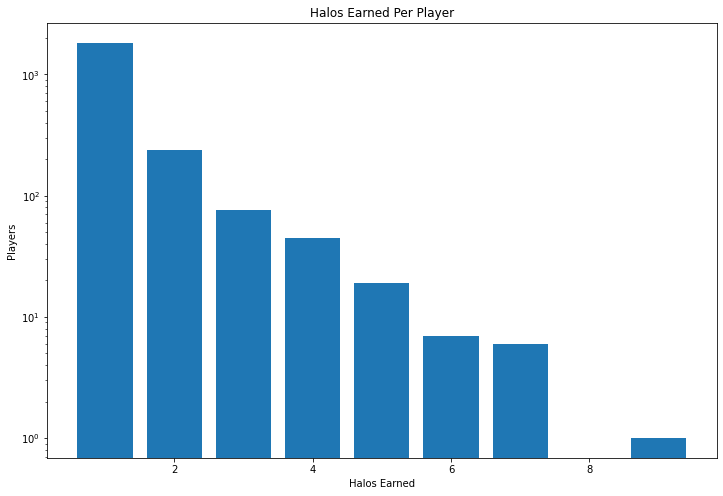

In [21]:
halofig = plt.figure('halos',figsize = (12,8))
haloax = halofig.add_subplot(111)
haloplot = haloax.bar(halodata.index,halodata)
haloax.set_yscale('log')
plt.title('Halos Earned Per Player')
plt.xlabel('Halos Earned')
plt.ylabel('Players');

For the top 100 ranks, there were a total of 2,900 Challenger Halos given out. 1,828 players recieved one. This is somewhat surprising to me. I had expected that there would be enough players playing a lot that more people would have many high scores. I'm also impressed by Lobbbbbbbbbb getting 9 halos total.

In [22]:
Lobbbbbbbbbb = hiscores[hiscores['Username'] == 'Lobbbbbbbbbb']
print(Lobbbbbbbbbb)

           Username   Rank  Level   Experience      Category
113    Lobbbbbbbbbb   14.0   99.0  200000000.0  Constitution
3218   Lobbbbbbbbbb   69.0   99.0  200000000.0        Attack
5685   Lobbbbbbbbbb   86.0   99.0  200000000.0       Defence
8090   Lobbbbbbbbbb   41.0   99.0  200000000.0      Strength
13037  Lobbbbbbbbbb   88.0   99.0  200000000.0        Ranged
17919  Lobbbbbbbbbb   70.0   99.0  200000000.0         Magic
28310  Lobbbbbbbbbb  661.0   89.0    5024468.0       Fishing
30151  Lobbbbbbbbbb   52.0   99.0  102387048.0    Firemaking
47889  Lobbbbbbbbbb   90.0   99.0  200000000.0      Thieving
57654  Lobbbbbbbbbb   55.0   99.0  200000000.0        Hunter


Interestingly Lobbbbbbbbbb placed in the top 100 for all but 1 skill that they were in the top 2,475 for. It seems they had a very specific goal of locking in halos and did so in the ED3able skills plus Thieving, Firemaking,and Hunter. 